In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import geopandas
from scipy.stats import norm


In [12]:
dataset ='Datafiniti_Vegetarian_and_Vegan_Restaurants.csv'




In [13]:
city_col = 'city'
province_col = 'province'   # histogram where each fbc has a count for a DUT (multiple blocks in a die)
cuisines_col = 'cuisines'
lat_col = 'latitude'
long_col = 'longitude'

In [14]:
print('Loading %s' %(dataset))

usecols = [city_col,province_col,cuisines_col,lat_col,long_col]
df = pd.read_csv(dataset, usecols=usecols)

print('Done Loading')

Loading Datafiniti_Vegetarian_and_Vegan_Restaurants.csv
Done Loading


In [8]:
print('Cities:')
print(df[city_col].unique())

print('Province:')
print(df[province_col].unique())


# match_df = slc_df[(slc_df[dr_col] == target_dr)]
match_df = df[(df[province_col] == 'CA')]
print(match_df)
print(match_df.shape)


Cities:
['Albany' 'San Diego' 'New York' 'Houston' 'Brooklyn' 'Long Island City'
 'Astoria' 'Jackson Heights' 'Torrance' 'San Francisco' 'Los Angeles'
 'Concord' 'Chicago' 'College Point' 'Bellerose' 'Glen Oaks' 'Austin'
 'Phoenix' 'Canoga Park' 'Tempe' 'Richmond' 'Newport Beach'
 'Salt Lake City' 'Encino' 'Hollywood' 'Escondido' 'Vienna' 'Westmont'
 'Boston' 'Pittsburgh' 'Woodside' 'Santa Fe' 'Miami' 'Beverly Hills'
 'Diamond Bar' 'Berkeley' 'Champaign' 'Evanston' 'South Richmond Hill'
 'Wellesley Hills' 'Charlotte' 'Penfield' 'Warren' 'Napa' 'Redmond'
 'Glendale' 'Overland Park' 'Atlanta' 'Santa Clara' 'Nashville' 'Carson'
 'Raleigh' 'Waltham' 'Seattle' 'Asbury Park' 'Cambridge' 'Tahoe City'
 'Portland' 'Dallas' 'San Jose' 'Tucson' 'Neenah' 'Arlington'
 'Minneapolis' 'Kew Gardens' 'Cary' 'Philadelphia' 'Flushing' 'Kƒ´hei'
 'Minnetonka' 'Olympia' 'Miami Beach' 'Key West' 'Rancho Santa Fe'
 'Manistee' 'Jamaica' 'Carrboro' 'Skowhegan' 'Reno' 'Walnut Creek'
 'Santa Rosa Beach']
Province:

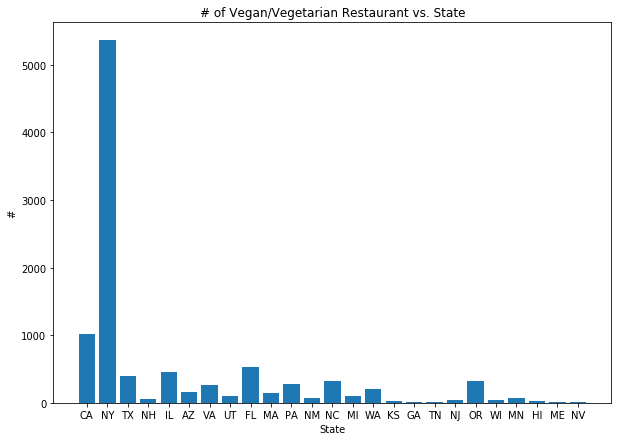

"\n## plotting\nplt.figure(figsize=(10,7))\n\nplt.semilogy(slc_fbc_list, sfr)\n\nplt.axhline(y=0.5, ls='--', color='black')\nplt.axvline(x=sfr_med, ls='--', color='black')\n\n# plt.axhline(y=sfr[sfr_target_index], ls='--', color='black')\n# plt.axvline(x=sfr_tail, ls='--', color='black')\n\nplt.title('Sector Failure Rate (1-CDF) for SLC (70C HTDR DR of %d Hours)' %(target_dr))\nplt.xlabel('FBC (per 4744 Bytes)')\nplt.ylabel('SFR')\n\nplt.ylim([1E-5, 2])\nplt.show()\n"

In [19]:
# let's create a single histogram of fbc to population
df_province_list = list(df[province_col].unique())

# each fbc has a corresponding count
count_list = []

for state in df_province_list:
    
    state_count = np.sum(df[province_col] == state)
    
    count_list.append(state_count)
    
    
# end for fbc


plt.figure(figsize=(10,7))

plt.bar(df_province_list,count_list)

plt.title('# of Vegan/Vegetarian Restaurant vs. State')
plt.xlabel('State')
plt.ylabel('#')

plt.show()


'''
## plotting
plt.figure(figsize=(10,7))

plt.semilogy(slc_fbc_list, sfr)

plt.axhline(y=0.5, ls='--', color='black')
plt.axvline(x=sfr_med, ls='--', color='black')

# plt.axhline(y=sfr[sfr_target_index], ls='--', color='black')
# plt.axvline(x=sfr_tail, ls='--', color='black')

plt.title('Sector Failure Rate (1-CDF) for SLC (70C HTDR DR of %d Hours)' %(target_dr))
plt.xlabel('FBC (per 4744 Bytes)')
plt.ylabel('SFR')

plt.ylim([1E-5, 2])
plt.show()
'''

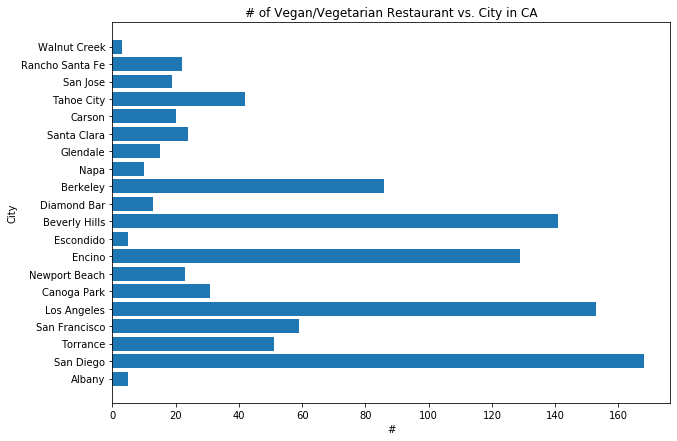

In [23]:
# let's create a single histogram of fbc to population
df_city_list = list(match_df[city_col].unique())

# each fbc has a corresponding count
count_list2 = []

for city in df_city_list:
    
    city_count = np.sum(match_df[city_col] == city)
    
    count_list2.append(city_count)
    
    
# end for fbc


plt.figure(figsize=(10,7))

plt.barh(df_city_list,count_list2)

plt.title('# of Vegan/Vegetarian Restaurant vs. City in CA')
plt.xlabel('#')
plt.ylabel('City')

plt.show()


sigma slope (from a$\sigma$ to b$\sigma$) $= \frac{b - a}{ln(\frac{BER(b\sigma)}{BER(a\sigma)})}$
  
Example for (a = 0, b = 4 )  
    $$= \frac{4 - 0}{ln(\frac{BER(4\sigma)}{BER(0\sigma)})}$$

Emulating QLC SFR
	Sigma Slope: 5.0
	0sigma BER: 0.47% (FBC: 179)
	4sigma BER: 1.05% (FBC: 398)
	BER Std Dev: 0.14% (FBC: 54)


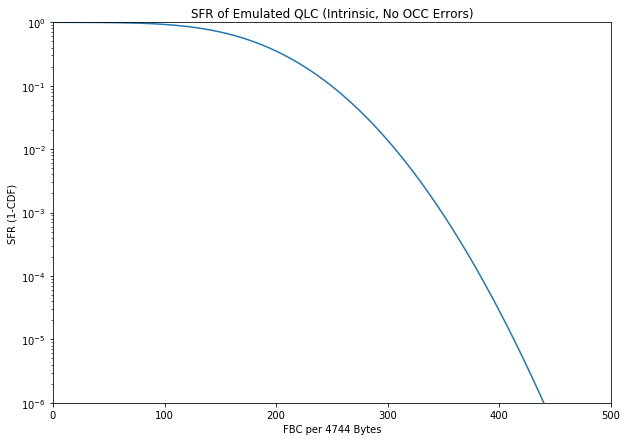

In [20]:
## for now, generate a QLC SFR

qlc_sigma_slope = 5

qlc_4sigma_ber = 0.0105

qlc_sfr_sigma = 4

qlc_0sigma_ber = qlc_4sigma_ber * np.exp(-qlc_sfr_sigma/qlc_sigma_slope)
    
qlc_std_dev_ber = (qlc_4sigma_ber - qlc_0sigma_ber) / qlc_sfr_sigma


sector_size_bits = 4744*8

qlc_0sigma_fbc = qlc_0sigma_ber * sector_size_bits
qlc_4sigma_fbc = qlc_4sigma_ber * sector_size_bits

qlc_std_dev_fbc = qlc_std_dev_ber * sector_size_bits

qlc_fbc_list = range(sector_size_bits)

# not using Gaussian since will include negative FBC
# let's create the CDF and then figure out the pdf
# qlc_fbc_pdf = norm.pdf(qlc_fbc_list, qlc_0sigma_fbc, qlc_std_dev_fbc)


qlc_fbc_sfr = 1-norm.cdf(qlc_fbc_list, qlc_0sigma_fbc, qlc_std_dev_fbc)

# calculate pdf from sfr
qlc_fbc_pdf = np.subtract(qlc_fbc_sfr[:-1], qlc_fbc_sfr[1:])
# add a copy of the last value b/c the delta had 1 less
qlc_fbc_pdf = np.append(qlc_fbc_pdf, qlc_fbc_pdf[-1])

qlc_fbc_pdf = np.divide(qlc_fbc_pdf, np.sum(qlc_fbc_pdf))   # normalize to deal with <0 adjusting population
qlc_fbc_pdf.tolist()

print('Emulating QLC SFR')
print('\tSigma Slope: %.1f' %(qlc_sigma_slope))
print('\t0sigma BER: %.2f%% (FBC: %d)' %(qlc_0sigma_ber * 100.0, qlc_0sigma_fbc))
print('\t4sigma BER: %.2f%% (FBC: %d)' %(qlc_4sigma_ber * 100.0, qlc_4sigma_fbc))
print('\tBER Std Dev: %.2f%% (FBC: %d)' %(qlc_std_dev_ber * 100.0, qlc_std_dev_fbc))

# plotting
plt.figure(figsize=(10,7))

# plt.semilogy(qlc_fbc_list, 1-np.cumsum(qlc_fbc_pdf))        # debug, should be same as sfr
plt.semilogy(qlc_fbc_list, qlc_fbc_sfr)

plt.xlim([0, 500])

plt.ylim([1e-6, 1])

plt.xlabel('FBC per 4744 Bytes')
plt.ylabel('SFR (1-CDF)')

plt.title('SFR of Emulated QLC (Intrinsic, No OCC Errors)')


plt.show()


In [21]:
## debug for looking at qlc pdf
# print np.sum(qlc_fbc_pdf[qlc_fbc_pdf >= 0])

# plt.figure(figsize=(10,10))

# plt.semilogy(qlc_fbc_list, qlc_fbc_pdf, linewidth=2)
# # plt.semilogy(qlc_fbc_list, norm.pdf(qlc_fbc_list, qlc_0sigma_fbc, qlc_std_dev_fbc), linewidth=1)

# plt.xlim([0, 500])
# plt.ylim([1e-4, 1])

# plt.show()


In [22]:
# create a matrix of probability SLC FBC = x and (intrinsic) QLC FBC = y
# size should be max(slc_fbc_list) by max(qlc_fbc_list)


# force a max qlc fbc to save space and time   (inclusive)
max_qlc_fbc = 500

qlc_fbc_search_range = range(max_qlc_fbc+1)

# X = SLC FBC, Y = QLC FBC
# initialize 
joint_pdf = np.zeros((max(slc_fbc_list)+1, max_qlc_fbc+1))

# also track the total fbc
joint_fbc = np.zeros(joint_pdf.shape)

# print('Generating Joint PDFs')
# print fbc_joint_pdf.shape

# X and Y are independent, so just multiply

for x_index, slc_fbc in enumerate(slc_fbc_list):
    
    slc_pdf = slc_fbc_pdf[x_index]
        
    for y_index, y in enumerate(qlc_fbc_search_range):
        
        qlc_fbc = qlc_fbc_list[y_index]
        qlc_pdf = qlc_fbc_pdf[y]

        joint_fbc[slc_fbc, qlc_fbc] = slc_fbc + qlc_fbc
            
        joint_pdf[slc_fbc, qlc_fbc] = slc_pdf * qlc_pdf

    # end for y
# end for x

print('Done Calculating Joint PDFs')

# let's analyze the joint PDF, have an array for total fbc and an array for pdf (sum of all total fbc that match)

total_fbc_list = []
total_pdf_list = []

# print np.unique(joint_fbc)

for fbc in np.unique(joint_fbc):
    # get the indices of all matches
    match_indices = np.argwhere(joint_fbc == fbc)
    
    total_pdf = 0
    
    for coord in match_indices:
        
        total_pdf += joint_pdf[coord[0], coord[1]]
    
    
    total_fbc_list.append(int(fbc))
    total_pdf_list.append(total_pdf)
        
# end for fbc

print('Done processing')

Done Calculating Joint PDFs
Done processing


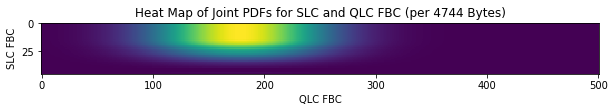

In [23]:
plt.figure(figsize=(10,10))

plt.imshow(joint_pdf)

plt.title('Heat Map of Joint PDFs for SLC and QLC FBC (per 4744 Bytes)')
plt.xlabel('QLC FBC')
plt.ylabel('SLC FBC')

plt.show()


4 Sigma FBCs (per 4744 Bytes):
	Intrinsic 4sigma 399
	OCC 4sigma 415
	Difference: 16


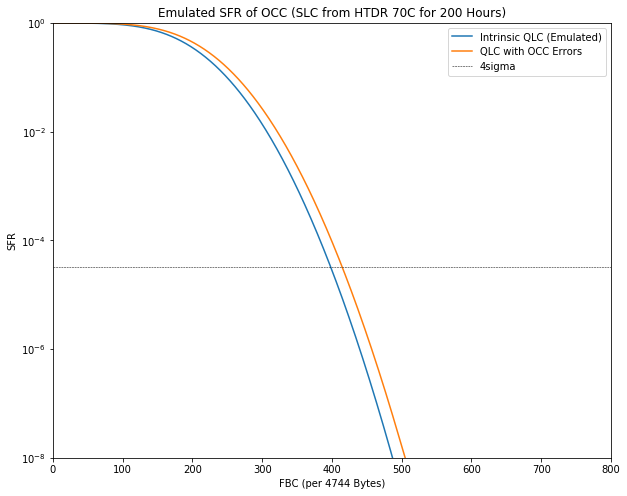

In [24]:
# calculate the sfr of the combined fbc

joint_sfr = 1 - np.cumsum(total_pdf_list)

# compare the 4 sigma numbers

ref_4sigma_fbc = qlc_fbc_list[np.argmax(qlc_fbc_sfr < 3.2e-5)]
occ_4sigma_fbc = total_fbc_list[np.argmax(joint_sfr < 3.2e-5)]

print('4 Sigma FBCs (per 4744 Bytes):')
print('\tIntrinsic 4sigma %d' %(ref_4sigma_fbc))
print('\tOCC 4sigma %d' %(occ_4sigma_fbc))
print('\tDifference: %d' %(occ_4sigma_fbc-ref_4sigma_fbc))


plt.figure(figsize=(10,8))

plt.semilogy(qlc_fbc_list, qlc_fbc_sfr, label='Intrinsic QLC (Emulated)')
plt.semilogy(total_fbc_list, joint_sfr, label='QLC with OCC Errors')

plt.axhline(y=3.2e-5, color='black', ls='--', lw=0.5, label='4sigma')

plt.xlabel('FBC (per 4744 Bytes)')
plt.ylabel('SFR')

plt.title('Emulated SFR of OCC (SLC from HTDR 70C for %d Hours)' %(target_dr))

plt.xlim([0,800])
plt.ylim([1e-8,1])

plt.legend()
plt.show()

